# Iman Noor
---

# **🔴 Dimensionality Reduction Techniques**

Dimensionality reduction techniques simplify complex datasets, reduce computational costs, and help prevent overfitting in machine learning models. 
- Common methods include Principal Component Analysis (`PCA`), Linear Discriminant Analysis (`LDA`), t-Distributed Stochastic Neighbor Embedding (`t-SNE`), and others.
- Other techniques include Independent Component Analysis (`ICA`) for separating a multivariate signal into independent components, and feature selection methods like SelectKBest and Recursive Feature Elimination (`RFE`).
---
## **Principal Component Analysis (PCA)**
PCA is a linear technique that transforms the original features into a new set of features called principal components. These components are orthogonal and capture the maximum variance in the data.
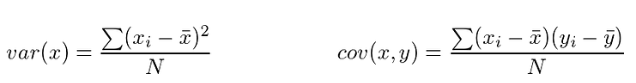

Covariance quantifies the degree to which corresponding elements in two sets of ordered data exhibit similar directional movement. The formula, represented as cov(x, y), captures the covariance between variables x and y.

- xi: represents the value of x in the ith dimension
- x bar and y bar: denote their respective mean values.

### **Covariance Matrix:**

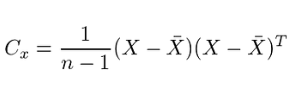

### **Steps:**

1. **Standardization:** Normalize data.
2. **Compute Covariance Matrix:** Understand variance and covariance.
3. **Calculate Eigenvectors and Eigenvalues:** Determine principal components.
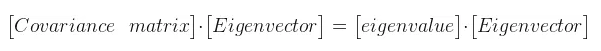

4. **Sort and Select Components:** Choose components that explain most variance.
5. **Transform Data:** Project data onto principal components.


## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [5]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

In [6]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [7]:
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (120, 4)
Reduced Training Data Shape (PCA): (120, 2)
Number of Components Selected: 2


### **Pros:**

- Effective for reducing features and computational complexity.
- Provides orthogonal components, simplifying interpretation.
- Useful for noise reduction and data visualization.

### **Cons:**

- Loss of original feature interpretability.
- Assumes linear relationships between features.
- Sensitive to scaling and outliers.

### **When to Use:**

- High-dimensional data.
- Features with high correlation.
- Visualization of data trends.

---
## **Linear Discriminant Analysis (LDA)**
LDA is a supervised technique that finds the linear combinations of features that best separate different classes. It is particularly useful for classification tasks.

### **Steps:**

1. **Compute Mean Vectors:** For each class.
2. **Compute Within-Class Scatter Matrix (Sw):** Spread within classes.
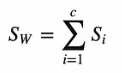 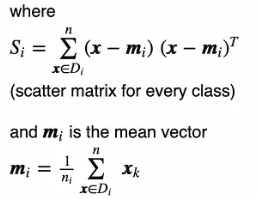
3. **Compute Between-Class Scatter Matrix (Sb):** Spread between classes.
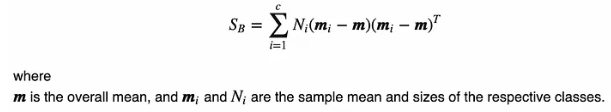
4. **Compute Eigenvalues and Eigenvectors:** Solve for discriminants.
5. **Sort Eigenvectors:** Select the most significant ones.
6. **Transform Data:** Project data onto new subspace.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

In [9]:
data_X, target_y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_X, target_y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
lda_model = LinearDiscriminantAnalysis()
X_train_lda = lda_model.fit_transform(X_train_scaled, y_train)

In [13]:
explained_var_ratio = lda_model.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_var_ratio)
num_components = np.argmax(cum_explained_variance >= 0.75) + 1

In [14]:
X_train_lda_reduced = X_train_lda[:, :num_components]
X_test_lda_reduced = lda_model.transform(X_test_scaled)[:, :num_components]
print(f"Number of components selected: {num_components}")

Number of components selected: 1


### **Pros:**

- Enhances class separation, aiding in classification.
- Reduces dimensionality with consideration of class labels.

### **Cons:**

- Sensitive to outliers.
- Assumes normally distributed features within classes.
- Requires sufficient sample sizes.

### **When to Use:**

- Classification tasks.
- Data where class separation is crucial.
- Situations where normality assumptions hold.
---
## **Singular Value Decomposition (SVD)**
Singular Value Decomposition is a matrix factorization technique widely used in various applications, including linear algebra, signal processing, and machine learning. It decomposes a matrix into three other matrices, allowing for the representation of the original matrix in a reduced form.

### **Steps:**

1. **Decompose Matrix:** Factorize matrix into U, Σ, and Vᵗ.
    - `U` is an m x m orthogonal matrix
    - `Σ` is an m x r diagonal matrix
    - `V` is an r x n orthogonal matrix. r is the rank of the matrix M.
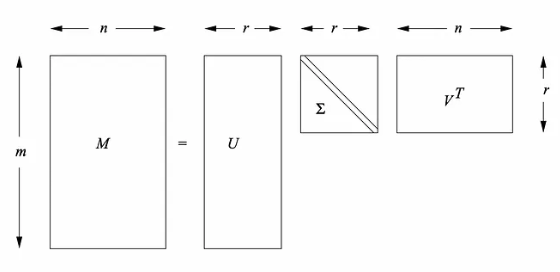

2. **Reduced Form (Truncated SVD):** Use top k singular values for dimensionality reduction.

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
text_documents = [
    "The quick brown fox jumps over the lazy dog",
    "The lazy dog sits in the corner",
    "The quick fox is very quick and nimble"
]

In [17]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_documents)

In [18]:
svd_transformer = TruncatedSVD(n_components=2)
tfidf_matrix_svd = svd_transformer.fit_transform(tfidf_matrix)

In [19]:
print("Original Shape:", tfidf_matrix.shape)
print("Reduced Shape:", tfidf_matrix_svd.shape)

Original Shape: (3, 15)
Reduced Shape: (3, 2)


### **Pros:**

- Versatile for various applications (e.g., text processing, recommender systems).
- Can handle sparse matrices effectively.

### **Cons:**

- Computationally intensive for large matrices.
- Interpretation of components may be complex.

### **When to Use:**

- Matrix factorization problems.
- High-dimensional data where dimensionality reduction is needed.
- Applications like latent semantic analysis and recommender systems.

---
## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
t-SNE is a non-linear technique primarily used for visualizing high-dimensional data in two or three dimensions. It focuses on preserving local structures in the data.

### **Key Steps:**

- Compute pairwise similarities in high-dimensional space.
- Create a probability distribution for these similarities.
- Optimize the low-dimensional representation to minimize the divergence between the two distributions.

In [20]:
df = pd.read_csv('BankNote.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
df['class'].unique()

array([0, 1], dtype=int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [23]:
features = ['variance', 'skewness', 'curtosis', 'entropy']
targets = ['class']

### Scaling data

In [24]:
data_norm = df.copy()
std_data = StandardScaler()
data_norm[features] = std_data.fit(df[features]).transform(df[features])

### TSNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components = 2, learning_rate = 500)

x_tsne = tsne.fit_transform(data_norm[features])

In [27]:
y_tsne = df[targets]

In [28]:
pd.DataFrame(x_tsne)

,0,1
0,-28.819801,-25.779907
1,-26.822790,-29.378880
2,37.071777,-29.899214
3,-60.819981,-10.401931
4,26.104042,-22.881344
...,...,...
1367,-2.071290,20.107506
1368,34.184704,18.727997
1369,60.413616,16.214188
1370,52.001461,14.781543


### Visualization

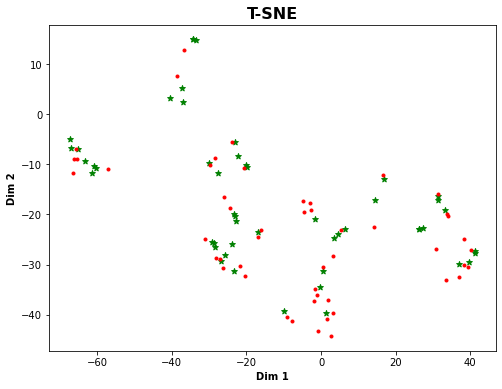

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1], color='g', marker='*')
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1], color='r', marker='.')
plt.xlabel('Dim 1', weight='bold')
plt.ylabel('Dim 2', weight='bold')
plt.title('T-SNE', weight='bold', fontsize=16)
plt.show()

---
## **Independent Component Analysis (ICA)**
ICA is used to separate a multivariate signal into additive, independent components. It is commonly used in signal processing and neuroimaging.
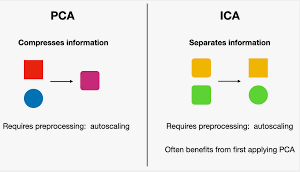 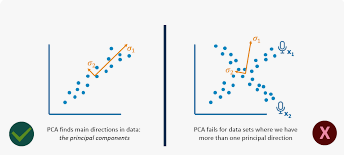

In [30]:
from sklearn.decomposition import FastICA

In [31]:
ica_model = FastICA(n_components=2, random_state=42)
X_train_ica = ica_model.fit_transform(X_train_scaled)

In [32]:
print("Original Training Data Shape:", X_train_scaled.shape)
print("Reduced Training Data Shape (ICA):", X_train_ica.shape)

Original Training Data Shape: (800, 20)
Reduced Training Data Shape (ICA): (800, 2)


---
## **Feature Selection Techniques**
Feature selection methods like `SelectKBest` and `Recursive Feature Elimination (RFE)` help in selecting the most relevant features based on statistical tests or model performance.

### **SelectKBest**

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_train_scaled, y_train)

In [35]:
print("Original Training Data Shape:", X_train_scaled.shape)
print("Reduced Training Data Shape (SelectKBest):", X_selected.shape)

Original Training Data Shape: (800, 20)
Reduced Training Data Shape (SelectKBest): (800, 10)


### **Recursive Feature Elimination (RFE)**
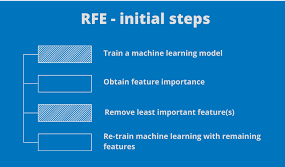

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg_model = LogisticRegression()

In [38]:
rfe_model = RFE(log_reg_model, n_features_to_select=2)
X_train_rfe = rfe_model.fit_transform(X_train_scaled, y_train)

In [39]:
print("Original Training Data Shape:", X_train_scaled.shape)
print("Reduced Training Data Shape (RFE):", X_train_rfe.shape)

Original Training Data Shape: (800, 20)
Reduced Training Data Shape (RFE): (800, 2)


# **The End :)**